
![](logo.png)

## Day Objectives

# Logistic Regression

* classification algorithm
* it forms the relation between features and target
* it's having some similar propertities related to Linear Regression


* The max value of linear regression is infinite 
* The max value of Logistic regression is 1

$$ log(P[1|0] / 1 + P[1|0]) = z$$

[Logistic Regression Official Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#)

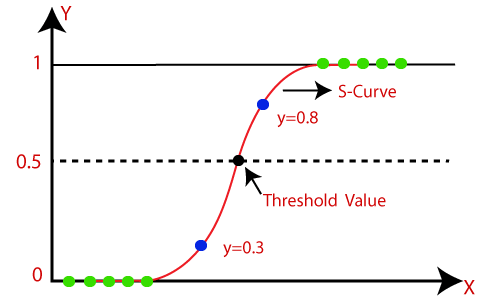

#### Types of Logistic regression:

* Binomial regression --- only two categories will be considered
* Multinomial Regression --- more than 3 unordered categories
* Ordinal Regression --- more than 3 ordered categories.

###  Normalizing Data



* Want to scale the individual data observations (i.e. rows)
* Used in classification Problems and data mining 

* when clustering data we need to apply L2 normalization to each row
* L2 normalization applied to a particular row of a data array 
* L2 norm of a row is just the square root of the sum of squared values for the row

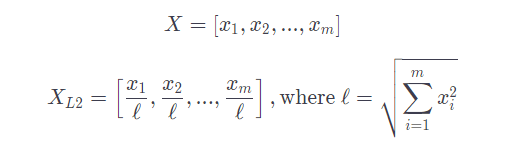


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
shirt = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/shirt.csv")
shirt

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [5]:
shirt[shirt["Size"]== "M"] # data masking

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [8]:
g_data = shirt.groupby("Size")
g_data.get_group("L")

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


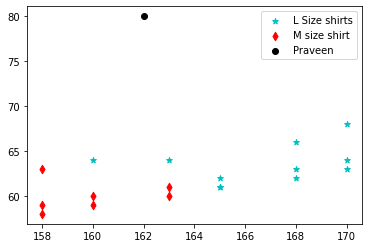

In [58]:
plt.scatter(g_data.get_group("L")["Height"],g_data.get_group("L")["Weight"], label = "L Size shirts", c = "c", marker = "*")
plt.scatter(g_data.get_group("M")["Height"],g_data.get_group("M")["Weight"], label = "M size shirt", c = "r", marker = "d")
plt.scatter(162,80, c = "black", label= "Praveen")
plt.legend()

plt.show()

In [18]:
X = shirt[["Height", "Weight"]]

In [19]:
y =shirt["Size"]

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lreg = LogisticRegression()

In [22]:
lreg.fit(X,y)

LogisticRegression()

In [23]:
lreg.predict(y)

ValueError: could not convert string to float: 'M'

In [24]:
y

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     L
8     L
9     L
10    L
11    L
12    L
13    L
14    L
15    L
16    L
17    L
Name: Size, dtype: object

In [26]:
from sklearn.preprocessing import LabelBinarizer
# it is preprocessing technique
# used to convert cetegorial type into numerical type data

In [27]:
lb = LabelBinarizer()

In [30]:
shirt["size"] = lb.fit_transform(shirt["Size"])
#m == 1
#l == 0

In [31]:
y = shirt["size"]

In [32]:
lreg.fit(X,y)

LogisticRegression()

In [38]:
lreg.predict([[158,58]])

array([1])

In [39]:
lreg.predict([[162,80]]) # 5.11 , 80 

array([0])

In [44]:
y = shirt[["size"]]
X

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [47]:
shirt["pred_values"] = lreg.predict(X)

In [48]:
shirt

,Height,Weight,Size,size,pred_values
0,158,58,M,1,1
1,158,59,M,1,1
2,158,63,M,1,1
3,160,59,M,1,1
4,160,60,M,1,1
5,163,60,M,1,1
6,163,61,M,1,1
7,160,64,L,0,0
8,163,64,L,0,0
9,165,61,L,0,0


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
accuracy_score(y,shirt["pred_values"])*100

100.0

In [54]:
confusion_matrix(y,shirt["pred_values"])

array([[11,  0],
       [ 0,  7]], dtype=int64)

In [59]:
homebuy = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/HomeBuyer.csv")
homebuy.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [60]:
homebuy.shape

(400, 3)

In [64]:
homebuy["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [65]:
X = homebuy[["Age", "EstimatedSalary"]]

In [66]:
y = homebuy["Purchased"]

In [67]:
X["Age"].min()

18

In [68]:
X["Age"].max()

60

In [69]:
X["EstimatedSalary"].min()

15000

In [70]:
X["EstimatedSalary"].max()

150000

# Data Preprocessing
- Getting the dataset
- Importing libraries
- Importing datasets
- Finding Missing Data
- Encoding Categorical Data
- Splitting dataset into training and test set
- Feature scaling


In [71]:
from sklearn.preprocessing import Normalizer

In [72]:
n = Normalizer()

In [100]:
n.fit(X)

Normalizer()

In [101]:
n_data = n.transform(X)

In [102]:
n_data

array([[9.99999500e-04, 9.99999500e-01],
       [1.74999732e-03, 9.99998469e-01],
       [6.04651052e-04, 9.99999817e-01],
       [4.73684157e-04, 9.99999888e-01],
       [2.49999992e-04, 9.99999969e-01],
       [4.65517191e-04, 9.99999892e-01],
       [3.21428555e-04, 9.99999948e-01],
       [2.13333328e-04, 9.99999977e-01],
       [7.57575540e-04, 9.99999713e-01],
       [5.38461460e-04, 9.99999855e-01],
       [3.24999983e-04, 9.99999947e-01],
       [4.99999938e-04, 9.99999875e-01],
       [2.32558133e-04, 9.99999973e-01],
       [1.77777497e-03, 9.99998420e-01],
       [2.19512190e-04, 9.99999976e-01],
       [3.62499976e-04, 9.99999934e-01],
       [1.87999668e-03, 9.99998233e-01],
       [1.73076664e-03, 9.99998502e-01],
       [1.64285493e-03, 9.99998651e-01],
       [1.65517015e-03, 9.99998630e-01],
       [2.04545027e-03, 9.99997908e-01],
       [9.59183232e-04, 9.99999540e-01],
       [1.17073091e-03, 9.99999315e-01],
       [2.04545027e-03, 9.99997908e-01],
       [1.999996

In [107]:
n_purchesed = n.fit_transform(homebuy[["Purchased"]])

In [108]:
model = LogisticRegression()

In [109]:
model.fit(n_data, n_purchesed)

C:\Users\lavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [114]:
y_pred  = model.predict(n_data)

In [115]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [112]:
accuracy_score(n_purchesed,y_pred)*100

64.25

In [113]:
confusion_matrix(y,y_pred)

array([[257,   0],
       [143,   0]], dtype=int64)

In [116]:
lreg_model = LogisticRegression()

In [117]:
lreg_model.fit(X,y)

LogisticRegression()

In [119]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [122]:
yPred = lreg_model.predict(X)

In [124]:
accuracy_score(y,yPred)*100

64.25

# Task
- take titanic dataset
- apply Logistic regression 


